# Загрузка библиотек и данных

In [1]:
import os
import json
import warnings
import re
import codecs
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup
from multiprocessing import Pool
from functools import reduce
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('Set2')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simbo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
wbdata = pd.read_csv('data/parsed_feedbacks.csv',index_col='Unnamed: 0',header=0, sep=";")

In [3]:
wbdata.head(30)

,id,wbUserId,imtId,nmId,subjectId,text,pros,cons,isObscene,matchingSize,...,complaints,answer,supplierComplaint.creationDate,supplierComplaint.botReviewDate,supplierComplaint.employeeReviewDate,supplierComplaint.state,supplierComplaint.type,supplierComplaint.answerForSupplier,supplierComplaint.employeeID,comments
0,ySk2BoQBbunnhI3g0xU9,64057163,25688833,36329770,593,Суперский наушник. Советую!,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MEk1BoQBCjydpYzrFmt5,51159913,25688833,36329770,593,Все что было показано в информации соответству...,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D1YjBoQBeiioYr22EfmO,21510092,25688833,34190391,593,"Наушники отличные. Звук яркий, в ушах лежат уд...",NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LZ8SBoQBwEHULCRVq4bn,94367198,25688833,34190391,593,Всё хорошо спасибо,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,jSkMBoQBbunnhI3gggIQ,14779696,25688833,34190391,593,За такую цену и такие наушники. Афигенно. Звуч...,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,88IMBoQBzFe4beEaQiDZ,59185698,25688833,34190391,593,"Все отлично ,звук ,качество материала ,единств...",NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,GG8JBoQB10yVmMKUO_3g,88056066,25688833,36329770,593,"Хорошие наушники, по бюджетной цене, спасибо з...",NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,SWsEBoQBZoamDvELzeRh,70385977,25688833,34190391,593,"Хорошие наушники. Цена приятная. Звук хороший,...",NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,xQ37BYQBI2nds0aGU1ti,26896049,25688833,34190391,593,"Удобные, хороший звук.",NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,g2_0BYQB10yVmMKUZfMP,93261242,25688833,34190391,593,Все отлично,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
col_mapping = [f"{c[0]}:{c[1]}" for c in enumerate(wbdata.columns)]

In [141]:
col_mapping

['0:id',
 '1:wbUserId',
 '2:imtId',
 '3:nmId',
 '4:subjectId',
 '5:text',
 '6:pros',
 '7:cons',
 '8:isObscene',
 '9:matchingSize',
 '10:matchingPhoto',
 '11:matchingDescription',
 '12:visibility',
 '13:productValuation',
 '14:color',
 '15:size',
 '16:createdDate',
 '17:updatedDate',
 '18:state',
 '19:metadata',
 '20:defectType',
 '21:feedbackHelpfulness',
 '22:photos',
 '23:photo',
 '24:video',
 '25:rank',
 '26:wasViewed',
 '27:supplierComplaint',
 '28:wbUserDetails.name',
 '29:wbUserDetails.country',
 '30:wbUserDetails.hasPhoto',
 '31:answer.text',
 '32:answer.supplierId',
 '33:answer.employeeId',
 '34:answer.metadata',
 '35:answer.state',
 '36:answer.editable',
 '37:answer.lastUpdate',
 '38:answer.createDate',
 '39:productDetails.imtId',
 '40:productDetails.nmId',
 '41:productDetails.productName',
 '42:productDetails.supplierArticle',
 '43:productDetails.supplierId',
 '44:productDetails.supplierName',
 '45:productDetails.brandId',
 '46:productDetails.brandName',
 '47:answerComplaints

In [142]:
wdt = wbdata.iloc[:,[6,14]]
wdt.rename(columns={'productValuation':'rating'},inplace=True)

In [143]:
wdt['length'] = wdt['text'].apply(lambda x: len(x))

KeyError: 'text'

In [14]:
wdt.sort_values(by='length', ascending=False)

,Unnamed: 0,text,rating,length,label
20620,20620,"У меня есть наушники honor magic earbuds, срав...",2,1000,0.25
5909,5909,"Про Хiaomi ни на коробке, ни на наушниках ни с...",4,999,0.75
49996,49996,Заказываю именно эти наушники уже шестой раз. ...,5,999,1.00
15204,15204,ПЛЮСЫ:\nНаушники пришли целыми и рабочими. \nО...,3,999,0.50
54778,54778,Достоинства:\nЦена. Брал вроде 530 были по ски...,2,999,0.25
...,...,...,...,...,...
48794,48794,Кайфы,5,5,1.00
6310,6310,👍👍👍👍👍,5,5,1.00
16649,16649,Вау!,5,4,1.00
52952,52952,👍.,5,2,1.00


In [ ]:
wdt.describe().T

In [ ]:
for i in wdt.columns:
    print(str(i) + ' : ' + str(wdt[i].nunique()))

In [ ]:
minwdt = wdt['rating'].min()
maxwdt = wdt['rating'].max()

In [ ]:
wdt['label']=wdt['rating'].apply(lambda x: (x - minwdt)/(maxwdt - minwdt)).round(2)

In [ ]:
wdt.to_csv('data/wdtrain.csv',sep = ';')

In [4]:
wdt = pd.read_csv('data/wdtrain.csv',sep = ';')

In [25]:
testtext =wdt[wdt['length']==150].values[4,1]

In [13]:
testtext = wdt.take([1234])['text'].values[0]
testtext

'Очень удобные и качественные наушники) Звук огонь)'

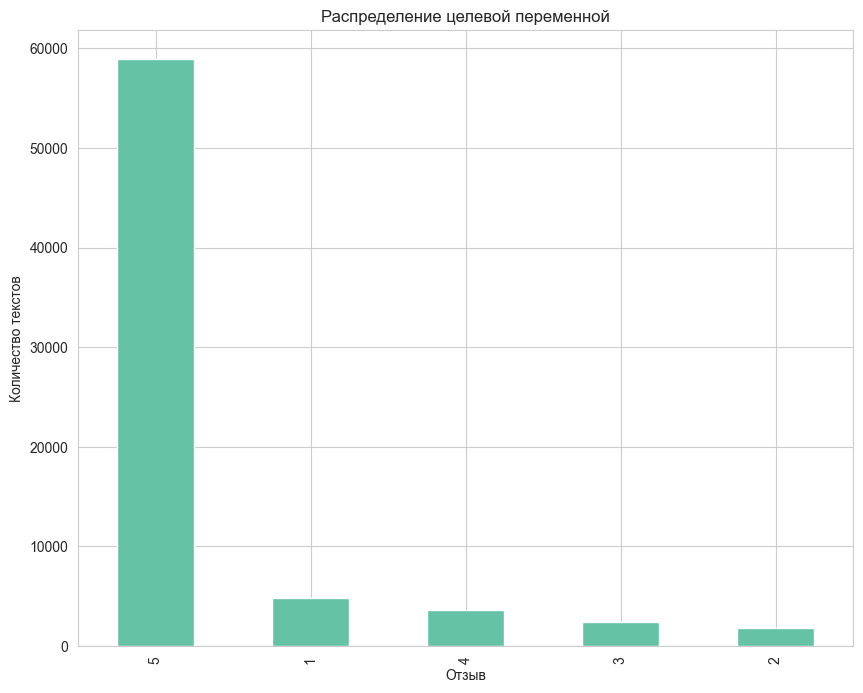

In [7]:
fig = plt.figure(figsize=(10, 8))
wdt['rating'].value_counts().plot(kind='bar');
plt.title("Распределение целевой переменной");
plt.xlabel("Отзыв");
plt.ylabel("Количество текстов");

In [ ]:
wdt['rating'].value_counts()

In [ ]:
wdt[wdt['rating']==5].sort_values('length', ascending=False).head(5000)

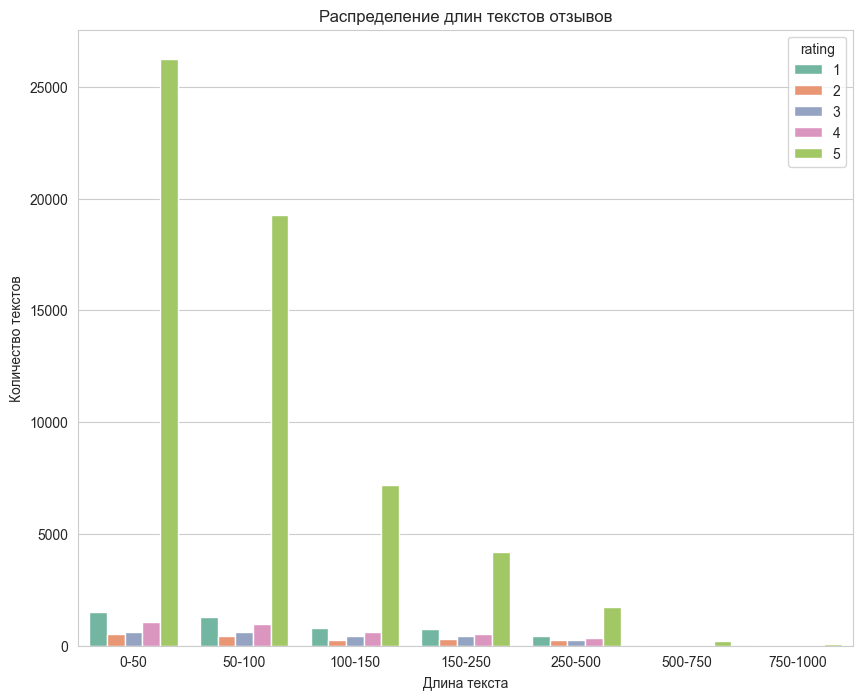

In [8]:
df = wdt.copy()
df['length'] = pd.cut(wdt['length'], bins=[0, 50, 100, 150, 250, 500, 750, 1000],
                      labels=['0-50','50-100','100-150','150-250', '250-500', '500-750', '750-1000'])

fig = plt.figure(figsize=(10, 8))
sns.countplot(x='length', hue='rating', data=df);
plt.title("Распределение длин текстов отзывов");
plt.xlabel("Длина текста");
plt.ylabel("Количество текстов");

# Предобработка текста и приведение к нормальнольной форме

In [26]:
import pymorphy2

lemmatizer = pymorphy2.MorphAnalyzer()
def textnormalization(text, lemmatizer = pymorphy2.MorphAnalyzer()):
    ''' Приведение русского текста к нормальной форме'''

    text = text.lower()
    text = re.sub("ё", "е", text)
    text = re.sub("[^а-я]+", " ", text)
    while "  " in text:
        text = re.sub("  ", " ", text)
    text = text.split(' ')
    atext = ''
    for tx in text:
        txt = lemmatizer.normal_forms(tx)
        atext = atext + ' ' + txt[0]
    if atext[0] == ' ':
        atext= atext[1:]
    if atext[-1] == ' ':
        atext= atext[:-1]
    #print(atext)
    return atext

In [27]:
print(testtext)
atext = textnormalization(testtext)
print(atext)

Наушники конечно очень хорошие ,но выключаются каждые 10 секунд по началу два часа работали замечательно ,а потом начали выключатся ,буду возвращать (
наушник конечно очень хороший но выключаться каждый секунда по начало два час работать замечательный а потом начать выключиться быть возвращать


In [ ]:
wdnt = wdt.copy()

wdnt['text'] = wdnt['text'].apply(lambda x: textnormalization(x, lemmatizer))

In [ ]:
wdnt['length'] = wdnt['text'].apply(lambda x: len(x))

In [ ]:
wdnt['length']==0

In [ ]:
wdnt = wdnt.loc[wdnt['length']!=0]

In [ ]:
wdnt.sort_values('length', ascending=True).head(5000)

In [ ]:
wdnt.rename(columns={'Unnamed: 0': 'id'}, inplace = True)

In [ ]:

wdnt

In [ ]:

wdnt.to_csv('data/wdntrain.csv',sep = ';', index=False)

In [ ]:
wdnt = pd.read_csv('data/wdntrain.csv',sep = ';', index_col='id')
wdnt.describe()

In [ ]:
df = wdnt.copy()
df['length'] = pd.cut(wdnt['length'], bins=[0, 50, 100, 150, 250, 500, 750, 1000],
                      labels=['0-50','50-100','100-150','150-250', '250-500', '500-750', '750-1000'])

fig = plt.figure(figsize=(10, 8))
sns.countplot(x='length', hue='rating', data=df);
plt.title("Распределение длин текстов отзывов");
plt.xlabel("Длина текста");
plt.ylabel("Количество текстов");

In [ ]:
wdnt[wdnt['rating']==5].sort_values('length', ascending=True).head(5000)

In [ ]:
df = wdnt.copy()
df['length'] = pd.cut(wdnt['length'], bins=[0, 50, 100, 150, 250, 500, 750, 1000],
                      labels=['0-50','50-100','100-150','150-250', '250-500', '500-750', '750-1000'])
df['len'] = df['text'].apply(lambda x: len(x))

In [ ]:
df

In [ ]:
lengr = df.groupby('length')

In [ ]:
lengr.groups.keys()

In [ ]:
for key in lengr.groups.keys():
    print(lengr.get_group(key).describe())

In [ ]:
gr = lengr.get_group('0-50')
gr.groupby('rating').groups

In [ ]:
for x, y in df.groupby(['length','rating']):
    print(x)
    print(y['rating'].count())

In [ ]:
cwdnt = pd.DataFrame()
for l, lgr in df.groupby('length'):
    print('len: ',l)
    rgr = lgr.groupby('rating')
    agg_func_count = {'rating': ['count']}
    a = rgr.agg(agg_func_count)
    maxl = np.sort(a[('rating', 'count')].values)[-2]
    print(a)
    print(maxl)
    for x, y in rgr:
        print('rating: ',x)
        cuted = y.sort_values('len', ascending=False).head(maxl)
        cwdnt = pd.concat([cwdnt, cuted])

In [ ]:
cwdnt.to_csv('data/cutedwdntrain.csv',sep = ';')

In [ ]:
cwdnt = shuffle(cwdnt,random_state=42)

In [ ]:
df = cwdnt.copy()
df['length'] = pd.cut(cwdnt['len'], bins=[0, 50, 100, 150, 250, 500, 750, 1000],
                      labels=['0-50','50-100','100-150','150-250', '250-500', '500-750', '750-1000'])

fig = plt.figure(figsize=(10, 8))
sns.countplot(x='length', hue='rating', data=df);
plt.title("Распределение длин текстов отзывов");
plt.xlabel("Длина текста");
plt.ylabel("Количество текстов");

# Моделирование

In [2]:
train = pd.read_csv('data/cutedwdntrain.csv',sep = ';', index_col='id')
train = shuffle(train, random_state=42)

In [3]:
def make_pipeline(vectorizer, transformer, classifier):
    return Pipeline([
            ('vectorizer', vectorizer),
            ('transformer', transformer),
            ('classifier', classifier)
        ])

In [4]:
def make_estimator(classifier, params_grid, scorer, data, labels):
    pipeline = make_pipeline(CountVectorizer(), TfidfTransformer(), classifier)
    grid_cv = RandomizedSearchCV(pipeline, params_grid, scoring=scorer, cv=5,
                                 random_state=42, n_iter=100, verbose=1, n_jobs=-1)
    grid_cv.fit(data, labels)
    return grid_cv

## Проверка выборки

In [10]:
texts = train['text'].values

In [26]:
texts

array(['почти месяц наушник пока хорошо работать микрофон конечно подводить',
       'писать огромный комментарий о тот какой они крутой но случайно закрыть поэтому кратко они тот стоять чтобы они заказать как человек у который наушник быть разный ценовой категория начинать от рубль и заканчивать тысяча мочь сказать точно этот наушник входить в мой топ хороший а такой у я мало я слишком хорошо разбираться в они поэтому за этот цена такой качество я слишком удивить посмотреть что быть',
       'при чем тут фирма вообще грязный хлипкий наушник цена качество',
       ..., 'хороший наушник интересный дизайн и хороший звук',
       'прислать наушник не работать',
       'ужасно через день использование левый наушник перестать работать а правый хрипеть повестись на отзыв но видимо они накрутить или купить так как вместе с наушник идти купон типо написать мы отзыв на звезда а мы вы сто рубль на карта не советовать продавец не помочь решить проблема ужас ужас и ещё раз ужас'],
      dtype=obje

In [11]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

In [27]:
X.shape

<17445x9219 sparse matrix of type '<class 'numpy.int64'>'
	with 290496 stored elements in Compressed Sparse Row format>

In [13]:
transformer = TfidfTransformer()

In [23]:
XX = transformer.fit_transform(X)

In [24]:
XX

<17445x9219 sparse matrix of type '<class 'numpy.float64'>'
	with 290496 stored elements in Compressed Sparse Row format>

In [25]:
print(XX)

  (0, 8754)	0.2429949603428106
  (0, 6605)	0.1628632230764314
  (0, 5979)	0.394298080635583
  (0, 5622)	0.33470498309033014
  (0, 5419)	0.584135485902065
  (0, 3791)	0.11129808559367206
  (0, 3408)	0.2885528675930569
  (0, 3376)	0.2809662661591509
  (0, 2889)	0.3621108778486231
  (1, 9167)	0.17353150240315532
  (1, 8932)	0.12237683733492379
  (1, 8929)	0.06505833716082206
  (1, 8878)	0.1269037184655478
  (1, 8836)	0.17949710307753056
  (1, 8829)	0.07269362838601004
  (1, 8754)	0.0763095351444535
  (1, 8752)	0.05748277345990891
  (1, 8356)	0.14305442070188867
  (1, 8268)	0.15729446233041725
  (1, 8160)	0.13682625339321824
  (1, 8155)	0.2007024699144945
  (1, 8131)	0.1335050073775914
  (1, 7994)	0.14974982692034733
  (1, 7860)	0.12257812347662082
  (1, 7455)	0.16359182000428102
  :	:
  (17444, 5355)	0.17197314310466216
  (17444, 5178)	0.0998334124047372
  (17444, 4693)	0.21515870435871082
  (17444, 4495)	0.07703127565767463
  (17444, 4181)	0.06130095261720241
  (17444, 3837)	0.0872381280

## Только 1 и 5 Классификатор

In [12]:
train1 =  shuffle(pd.concat([train[train['label']==0],train[train['label']==1]]),random_state=42)

In [13]:
train1['label'] = train1['label'].apply(lambda x: int(x))

In [14]:
train1.describe()

,rating,label,len
count,9641.000000,9641.000000,9641.000000
mean,3.001037,0.500259,127.879369
std,2.000103,0.500026,119.964041
min,1.000000,0.000000,1.000000
25%,1.000000,0.000000,49.000000
50%,5.000000,1.000000,97.000000
75%,5.000000,1.000000,149.000000
max,5.000000,1.000000,960.000000


In [15]:
X = train1['text'].values
y = train1['label'].values

In [16]:
score = cross_val_score(make_pipeline(CountVectorizer(), TfidfTransformer(), LinearSVC(random_state=777)), X, y, cv=5)
print(f"LinearSVC - {score.mean()}")

LinearSVC - 0.9698165583612433


In [17]:
score

array([0.9683774 , 0.96939834, 0.97354772, 0.96524896, 0.97251037])

## Классификатор по всем меткам

In [5]:
X = train['text'].values
y = train['rating'].values

In [6]:
X

array(['почти месяц наушник пока хорошо работать микрофон конечно подводить',
       'писать огромный комментарий о тот какой они крутой но случайно закрыть поэтому кратко они тот стоять чтобы они заказать как человек у который наушник быть разный ценовой категория начинать от рубль и заканчивать тысяча мочь сказать точно этот наушник входить в мой топ хороший а такой у я мало я слишком хорошо разбираться в они поэтому за этот цена такой качество я слишком удивить посмотреть что быть',
       'при чем тут фирма вообще грязный хлипкий наушник цена качество',
       ..., 'хороший наушник интересный дизайн и хороший звук',
       'прислать наушник не работать',
       'ужасно через день использование левый наушник перестать работать а правый хрипеть повестись на отзыв но видимо они накрутить или купить так как вместе с наушник идти купон типо написать мы отзыв на звезда а мы вы сто рубль на карта не советовать продавец не помочь решить проблема ужас ужас и ещё раз ужас'],
      dtype=obje

In [7]:
y

array([4, 5, 1, ..., 5, 1, 1], dtype=int64)

In [8]:
stop_words = stopwords.words('russian')

In [9]:
train['rating'].value_counts()

5    4823
1    4818
4    3575
3    2402
2    1827
Name: rating, dtype: int64

In [175]:
def make_pipeline(vectorizer, transformer, classifier):
    return Pipeline([
            ('vectorizer', vectorizer),
            ('transformer', transformer),
            ('classifier', classifier)
        ])

In [176]:
def make_estimator(classifier, params_grid, scorer, data, labels):
    pipeline = make_pipeline(CountVectorizer(), TfidfTransformer(), classifier)
    grid_cv = RandomizedSearchCV(pipeline, params_grid, scoring=scorer, cv=5,
                                 random_state=777, n_iter=100, verbose=1, n_jobs=-1)
    grid_cv.fit(data, labels)
    return grid_cv

In [180]:
#score = cross_val_score(make_pipeline(CountVectorizer(), TfidfTransformer(), LinearSVC(random_state=777)), X, y, cv=5)
#print(f"LinearSVC - {score.mean()}")

LinearSVC - 0.6811693895098883


In [181]:
score

array([0.68758957, 0.67669819, 0.68329034, 0.68099742, 0.67727142])